In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sympy import symbols, diff, cos, sin, sqrt, lambdify, simplify, Q, refine, nsolve, solve, pi
import rebound
rebound.__build__

'Dec 15 2023 12:10:19'

In [2]:
labelnew = r"$dt_{\mathrm{PRS23}}$, this paper"
labelold = r"$dt_{\mathrm{RS15}}$, Rein & Spiegel (2015)"
labelA85 = r"$dt_{\mathrm{A85}}$, Aarseth (1985)"

In [3]:
sim = rebound.Simulation()
sim.add("outer solar system")
P0 = sim.particles[1].P

In [4]:
def run(tmax,epsilon,adaptive_mode=1):
    sim = rebound.Simulation()
    sim.ri_ias15.adaptive_mode = adaptive_mode
    sim.ri_ias15.epsilon = epsilon
    sim.add("outer solar system")
    sim.move_to_com()
    e0 = sim.energy()
    sim.dt = 1e0
    sim.integrate(tmax*P0,exact_finish_time=0)
    e1 = sim.energy()
    return np.fabs((e0-e1)/e0)

In [5]:
epsilons = np.logspace(-10, -3, 1000)
errors1e3y_1 = np.zeros(len(epsilons))
errors1e3y_2 = np.zeros(len(epsilons))

In [6]:
for i in range(len(epsilons)):
    errors1e3y_1[i] = run(1e2,epsilons[i],adaptive_mode=1)

In [7]:
for i in range(len(epsilons)):
    errors1e3y_2[i] = run(1e2,epsilons[i],adaptive_mode=2)

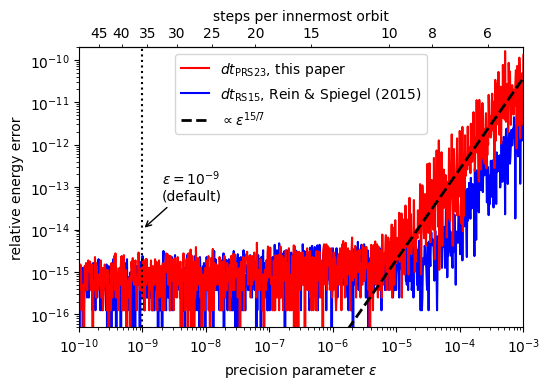

In [12]:
fig, ax = plt.subplots(figsize=(5.6,4))

ax.set_xlabel(r"precision parameter $\epsilon$")
ax.set_ylabel("relative energy error")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlim([np.min(epsilons),np.max(epsilons)])
ax.set_ylim([5e-17,2e-10])
ax.plot(epsilons, errors1e3y_2, label=labelnew,color="red", zorder=2)
ax.plot(epsilons, errors1e3y_1, label=labelold,color="blue", zorder=1)


def eps2steps(eps):
    return 1./(np.power(eps*5040,1./7.)/(2*np.pi))
def steps2eps(steps):
    return (1./(steps+1e-16)*2*np.pi)**7/5040

secax = ax.secondary_xaxis('top', functions=(eps2steps, steps2eps))
secax.set_xlabel('steps per innermost orbit')
ax.axvline(1e-9,color="black",ls=":")
ax.annotate(r"$\epsilon=10^{-9}$"+"\n(default)", xy=(1e-9, 1e-14), xytext=(2e-9, 5e-14),
            arrowprops=dict(arrowstyle="->", facecolor='black'),
            )
#secax.set_xscale("log")

dts = epsilons**(1/7)
ax.plot(epsilons,1e-4*dts**15, lw=2, ls="--",color='black',label="$\propto \epsilon^{15/7}$")

locs = np.append( np.arange(15,50,5),np.arange(2,11,2))
secax.xaxis.set_minor_locator(ticker.FixedLocator(locs))
secax.xaxis.set_major_locator(ticker.NullLocator())

secax.xaxis.set_minor_formatter(ticker.ScalarFormatter())
ax.legend()
fig.tight_layout()
fig.savefig("epsilon.png",dpi=500)